In [11]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import numpy as np
import math
import matplotlib
#matplotlib.use("Agg")
import matplotlib.image as mpimg
import glob
from data_utils import load_data, augment_data,normalise_train,normalise_test,rgb2gray,rgb2lab,lab2rgb
import matplotlib.pyplot as plt
from tucha import complex_pokemon_model,baselinish,simpler_model,baselinish2,complex_pokemon_model2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
X_train,X_test,Y_train, Y_test = load_data()
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

print (Y_train.dtype)
lab_data = rgb2lab(Y_train)

mean_val = np.mean(Y_train)
print (np.max(Y_train))
print (np.min(Y_train))
print (mean_val)
#Y_train = Y_train - mean_val
print (np.max(Y_train))
print (np.min(Y_train))
#print (lab_data.shape) 
#lab_data,mean_dat,std_dat = normalise_train(lab_data)

0
(49, 64, 64, 1)
(13, 64, 64, 1)
(49, 64, 64, 3)
(13, 64, 64, 3)
uint8
255
0
98.7152440078
255
0


(49, 64, 64, 3)
(64, 64, 3)
(64, 64, 3)


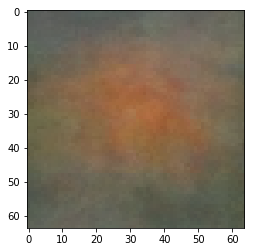

In [22]:
Y_train,mean_image,std_image = normalise_train(Y_train)
print (Y_train.shape)
print (mean_image.shape)
print (std_image.shape)
plt.imshow(mean_image[:,:,:].astype('uint8'))
plt.show()
#X_test = normalise_test(X_test,mean_image,std_image)
#print(X_test.shape)
#print (X_train.shape)

In [5]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, 64, 64,1])
Y = tf.placeholder(tf.float32 ,[None , 64,64,3])
is_training = tf.placeholder(tf.bool)

with tf.variable_scope("model") as scope:
    y_out = complex_pokemon_model(X)
    loss = tf.sqrt(tf.nn.l2_loss(y_out-Y))
    optimiser = tf.train.AdamOptimizer(1e-4)
    train_step = optimiser.minimize(loss)

    scope.reuse_variables()
    test_model = complex_pokemon_model(X,False)
    loss_test = tf.sqrt(tf.nn.l2_loss(test_model - Y))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 32
def train_epoch(data, target):
    sizee = data.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y:   (target[i*batch_size:batch_size*i+batch_size]), X: data[i*batch_size:batch_size*i+batch_size],is_training:True}
        losses,_ = sess.run([loss,train_step],feed_dict)
        if(i%5==0):
            print (losses)

  

def val_result(data, target):
    sizee = data.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y:  (target[i*batch_size:batch_size*i+batch_size]), X: data[i*batch_size:batch_size*i+batch_size],is_training:False}
        losses = sess.run([loss_test],feed_dict)
        if(i%5 ==0):
            print (losses)

num_epochs = 10
for i in range(num_epochs):
    train_epoch(X_train, Y_train)
    val_result(X_test, Y_test)

    



KeyboardInterrupt: 

In [9]:
### Image visualisation
import matplotlib.pyplot as plt
import numpy.random as rnd

#def rgb2gray2(rgb):
 #   a = np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
  #  return a

rand_indices = np.random.choice(400,10)
sample_images = X_train[rand_indices]
samp = Y_train[rand_indices]
print (sample_images.shape)
grayed_sample_images = (sample_images)
print (grayed_sample_images.shape)

feed_dict = {X:grayed_sample_images[:,:,:],Y:samp,is_training:True}
model_generated_images = sess.run([test_model,loss_test],feed_dict)
print (model_generated_images[1])
print(model_generated_images[0].shape)

def show_images(images,gray = False):

    
    if(gray):
        plt.subplot(221)
        plt.imshow(images[0],cmap = plt.get_cmap('gray'))
        plt.subplot(222)
        plt.imshow(images[1], cmap = plt.get_cmap('gray'))
        plt.subplot(223)
        plt.imshow(images[2], cmap = plt.get_cmap('gray'))
        plt.subplot(224)
        plt.imshow(images[3], cmap = plt.get_cmap('gray'))
    else :
        plt.subplot(221)
        plt.imshow(images[0]);
        plt.subplot(222)
        plt.imshow(images[1])
        plt.subplot(223)
        plt.imshow(images[2])
        plt.subplot(224)
        plt.imshow(images[3])

    plt.show()
    
    
show_images((samp))
#show_images(grayed_sample_images,gray = True)
show_images((model_generated_images[0]) )

    

IndexError: index 168 is out of bounds for axis 0 with size 49

In [4]:
def show_images(images,gray = False):

    
    if(gray):
        plt.imshow(images,cmap = plt.get_cmap('gray'))
    else :
        plt.imshow(images);

    plt.show()

(49, 64, 64, 3)
7.17073


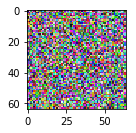

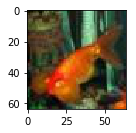

55.0838


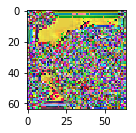

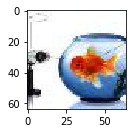

4.88479


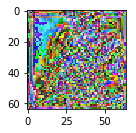

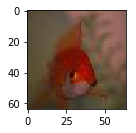

8.50052


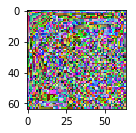

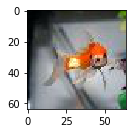

Next Epoch 0
3.12067
1.48597
1.46862
1.27002
Next Epoch 1
0.821778
0.570816
0.580834
0.354889
Next Epoch 2
0.332285
0.253279
0.354654
0.186949
Next Epoch 3
0.184633
0.15086
0.193865
0.121738
Next Epoch 4
0.102697


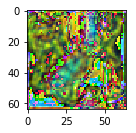

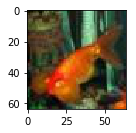

0.103821


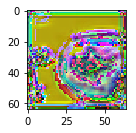

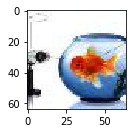

0.120279


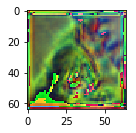

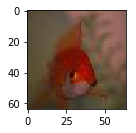

0.0906831


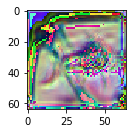

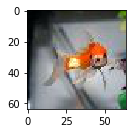

Next Epoch 5
0.0691499
0.0862651
0.10255
0.0758654
Next Epoch 6
0.0566742
0.0686654
0.09236
0.060566
Next Epoch 7
0.0501182
0.0559259
0.0839786
0.0551317
Next Epoch 8
0.0502435
0.0505423
0.0756663
0.0484099
Next Epoch 9
0.0398557


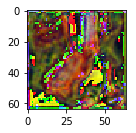

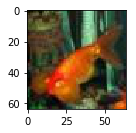

0.0444481


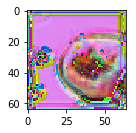

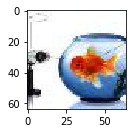

0.0681144


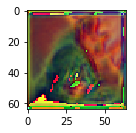

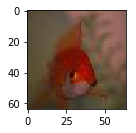

0.0450219


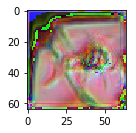

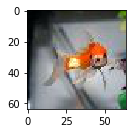

Next Epoch 10
0.0327918
0.0402854
0.0625838
0.042803
Next Epoch 11
0.0302056
0.0370909
0.0566002
0.0417633
Next Epoch 12
0.0292634
0.0356738
0.0533902
0.0389657
Next Epoch 13
0.0268776
0.0339373
0.0535138
0.0367172
Next Epoch 14
0.0261188


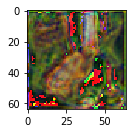

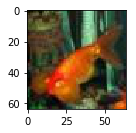

0.0321514


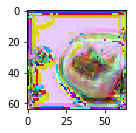

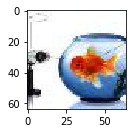

0.0520005


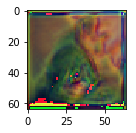

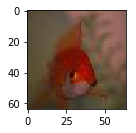

0.0353401


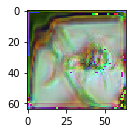

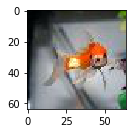

Next Epoch 15
0.0263
0.0315902
0.0492866
0.0344128
Next Epoch 16
0.0253268
0.03079
0.0486438
0.0332225
Next Epoch 17
0.0235539
0.0297295
0.0481323
0.0325466
Next Epoch 18
0.0227434
0.0291669
0.0463213
0.0320768
Next Epoch 19
0.0224576


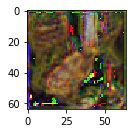

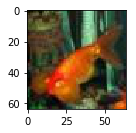

0.0283633


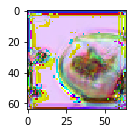

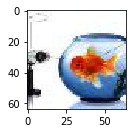

0.0456677


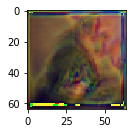

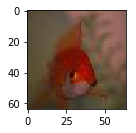

0.0314103


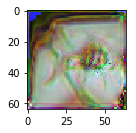

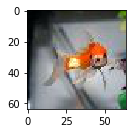

Next Epoch 20
0.0217562
0.0275008
0.0454258
0.0307683
Next Epoch 21
0.0212153
0.026991
0.0444954
0.0303856
Next Epoch 22
0.0209326
0.0265107
0.0436685
0.02998
Next Epoch 23
0.0205022
0.0261405
0.0432226
0.0295066
Next Epoch 24
0.0199971


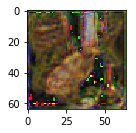

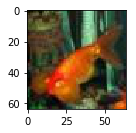

0.0258106


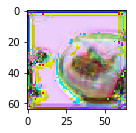

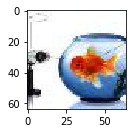

0.0427628


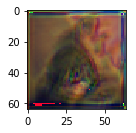

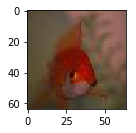

0.0290926


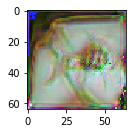

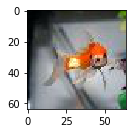

Next Epoch 25
0.0197509
0.0254177
0.0422549
0.0287238
Next Epoch 26
0.0195037
0.0250778
0.0418789
0.0283687
Next Epoch 27
0.0191696
0.0247034
0.0415931
0.0280717
Next Epoch 28
0.0188596
0.0244122
0.0411753
0.0278286
Next Epoch 29
0.018591


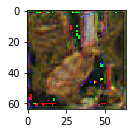

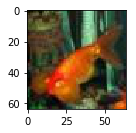

0.0241058


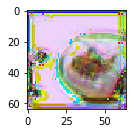

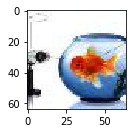

0.0408451


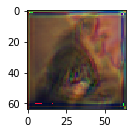

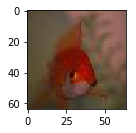

0.0275745


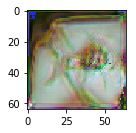

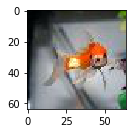

Next Epoch 30
0.0183033
0.0238755
0.0405944
0.0273022
Next Epoch 31
0.018046
0.023656
0.0402873
0.0270606
Next Epoch 32
0.0178588
0.0233869
0.0400085
0.0268403
Next Epoch 33
0.0176388
0.0231637
0.0397775
0.0266213
Next Epoch 34
0.0174573


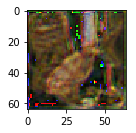

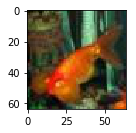

0.0229483


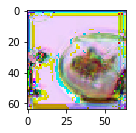

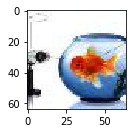

0.0395367


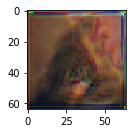

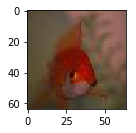

0.0264207


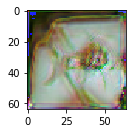

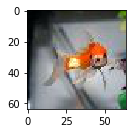

Next Epoch 35
0.0172628
0.0227101
0.0393784
0.0262349
Next Epoch 36
0.0171076
0.0225428
0.0391068
0.0260522
Next Epoch 37
0.0169306
0.022343
0.038977
0.0258699
Next Epoch 38
0.0167825
0.0221318
0.0387494
0.0256714
Next Epoch 39
0.0166425


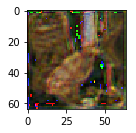

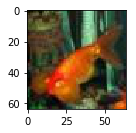

0.0219768


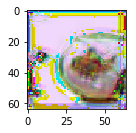

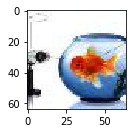

0.0384505


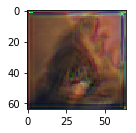

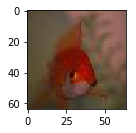

0.0254917


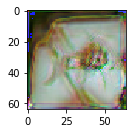

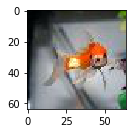

Next Epoch 40
0.0165077
0.021826
0.0383427
0.0253098
Next Epoch 41
0.0163649
0.0217144
0.0381541
0.025138
Next Epoch 42
0.0162127
0.0215608
0.038004
0.0249965
Next Epoch 43
0.016077
0.0214042
0.0378953
0.0248747
Next Epoch 44
0.015961


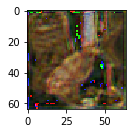

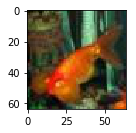

0.0213225


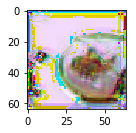

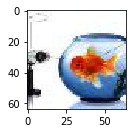

0.0376583


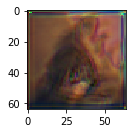

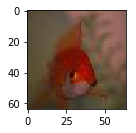

0.0247489


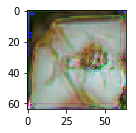

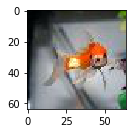

Next Epoch 45
0.0158698
0.0211979
0.0375734
0.0246121
Next Epoch 46
0.0157506
0.0211076
0.03741
0.024492
Next Epoch 47
0.0156461
0.0210245
0.0372458
0.0243876
Next Epoch 48
0.0155585
0.0208707
0.0371921
0.0242896
Next Epoch 49
0.0154363


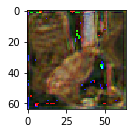

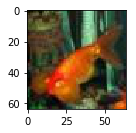

0.0208272


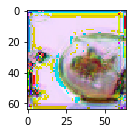

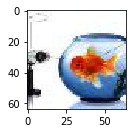

0.0370334


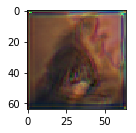

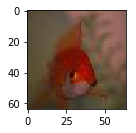

0.0241948


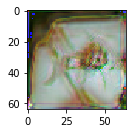

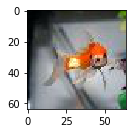

Next Epoch 50
0.0153835
0.0207217
0.0369571
0.024096
Next Epoch 51
0.0152628
0.0206101
0.0368829
0.0240019
Next Epoch 52
0.0152077
0.0205743
0.0367093
0.0239073
Next Epoch 53
0.0151152
0.0204381
0.0366952
0.0238197
Next Epoch 54
0.0150404


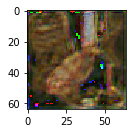

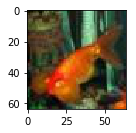

0.0204046


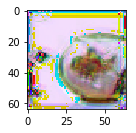

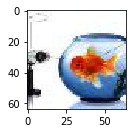

0.0365454


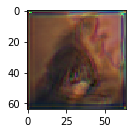

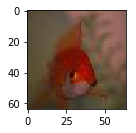

0.0237331


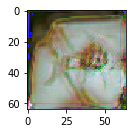

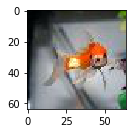

Next Epoch 55
0.0149756
0.0202929
0.0364731
0.0236535
Next Epoch 56
0.0149106
0.0202589
0.0363978
0.0235735
Next Epoch 57
0.0148282
0.0201754
0.0362995
0.0235048
Next Epoch 58
0.0147716
0.020082
0.036212
0.0234257
Next Epoch 59
0.0146979


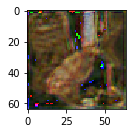

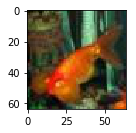

0.0200344


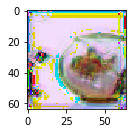

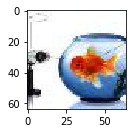

0.0361171


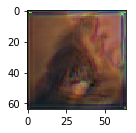

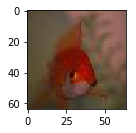

0.0233419


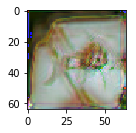

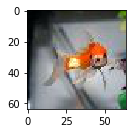

Next Epoch 60
0.0146585
0.0199992
0.036068
0.0232815
Next Epoch 61
0.0145877
0.0199065
0.0359852
0.0232135
Next Epoch 62
0.0145374
0.0198735
0.0359134
0.0231537
Next Epoch 63
0.0144729
0.0198121
0.0357945
0.0230759
Next Epoch 64
0.0144316


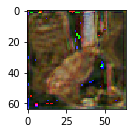

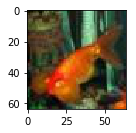

0.0197566


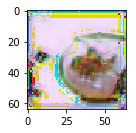

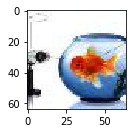

0.0357443


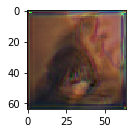

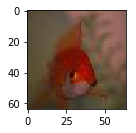

0.0230164


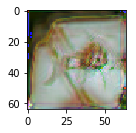

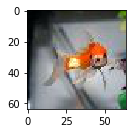

Next Epoch 65
0.0143836
0.019706
0.0356479
0.0229511
Next Epoch 66
0.0143333
0.0196632
0.0355357
0.0228906
Next Epoch 67
0.0142848
0.0195978
0.0354577
0.0228377
Next Epoch 68
0.0142514
0.019556
0.0353573
0.0227733
Next Epoch 69
0.014224


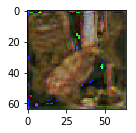

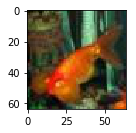

0.0194997


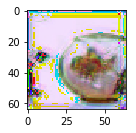

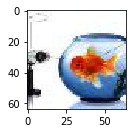

0.0352494


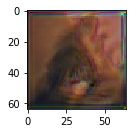

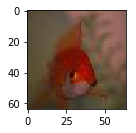

0.0227186


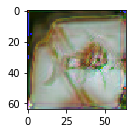

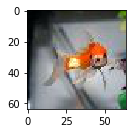

Next Epoch 70
0.0141804
0.0194817
0.0350674
0.0226586
Next Epoch 71
0.0141375
0.0194918
0.0350351
0.0226167
Next Epoch 72
0.0140747
0.0194222
0.034872
0.0225787
Next Epoch 73
0.0140243
0.0193994
0.0348031
0.02255
Next Epoch 74
0.0139388


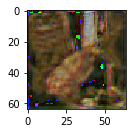

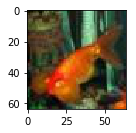

0.0193539


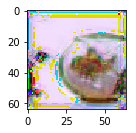

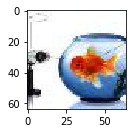

0.0346854


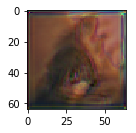

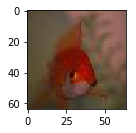

0.022494


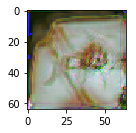

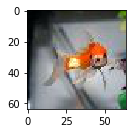

Next Epoch 75
0.0139067
0.0192667
0.0345974
0.0224374
Next Epoch 76
0.0138789
0.0192473
0.0344831
0.0223798
Next Epoch 77
0.0138428
0.0192255
0.0344366
0.0223308
Next Epoch 78
0.0137816
0.0191633
0.0343098
0.022287
Next Epoch 79
0.0137668


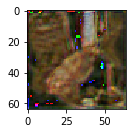

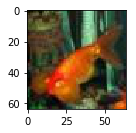

0.0191246


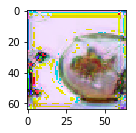

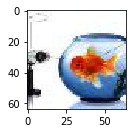

0.0342361


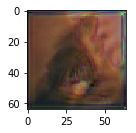

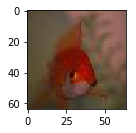

0.0222487


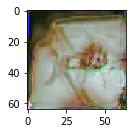

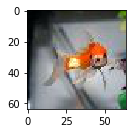

Next Epoch 80
0.0137087
0.0190953
0.0341262
0.0222135
Next Epoch 81
0.0136876
0.019036
0.0340484
0.0221751
Next Epoch 82
0.0136341
0.0190233
0.0339529
0.0221432
Next Epoch 83
0.0136045
0.0189566
0.0338724
0.0221074
Next Epoch 84
0.0135811


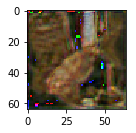

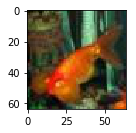

0.0189476


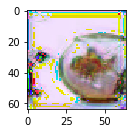

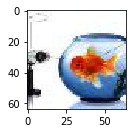

0.0337742


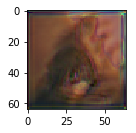

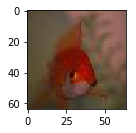

0.0220692


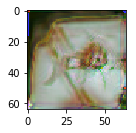

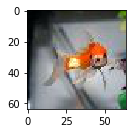

Next Epoch 85
0.0135287
0.0188919
0.0337038
0.0220332
Next Epoch 86
0.0135267
0.018888
0.033643
0.0220013
Next Epoch 87
0.0134877
0.0188353
0.0335732
0.0219739
Next Epoch 88
0.0134671
0.018827
0.0334853
0.0219431
Next Epoch 89
0.013431


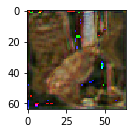

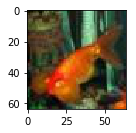

0.018809


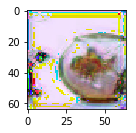

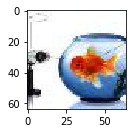

0.0334088


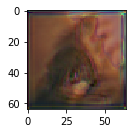

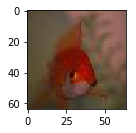

0.0219164


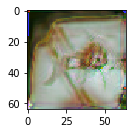

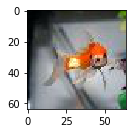

Next Epoch 90
0.0134074
0.0187733
0.0333251
0.0218825
Next Epoch 91
0.0133739
0.0187505
0.0332484
0.0218493
Next Epoch 92
0.0133589
0.0187154
0.0331767
0.0218362
Next Epoch 93
0.0133358
0.0187068
0.0331079
0.0218091
Next Epoch 94
0.0132872


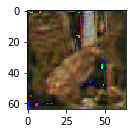

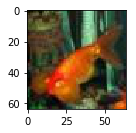

0.0186553


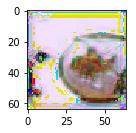

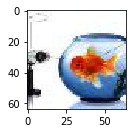

0.0330434


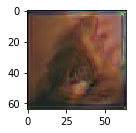

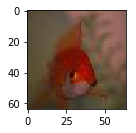

0.0217812


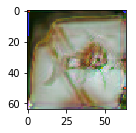

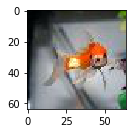

Next Epoch 95
0.0132898
0.0186626
0.0329303
0.0217543
Next Epoch 96
0.0132498
0.0185997
0.0329046
0.021732
Next Epoch 97
0.0132183
0.0186091
0.0327692
0.0217161
Next Epoch 98
0.0132324
0.0185547
0.032793
0.0216838
Next Epoch 99
0.0131788


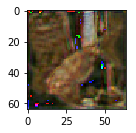

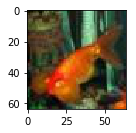

0.0185903


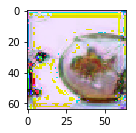

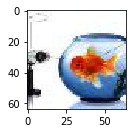

0.0326872


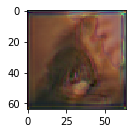

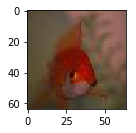

0.0216745


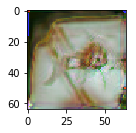

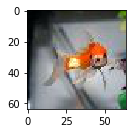

Next Epoch 100
0.0131684
0.0185195
0.032613
0.0216462
Next Epoch 101
0.0131389
0.0185367
0.0325521
0.0216388
Next Epoch 102
0.0131272
0.0184798
0.0324693
0.0216007
Next Epoch 103
0.0131082
0.0184587
0.0324176
0.0215975
Next Epoch 104
0.0130763


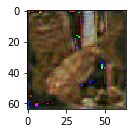

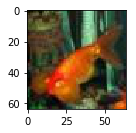

0.0184697


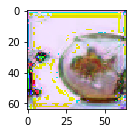

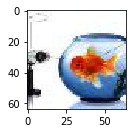

0.032358


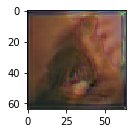

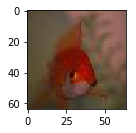

0.0215805


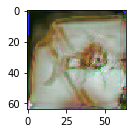

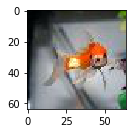

Next Epoch 105
0.0130699
0.0184478
0.0322551
0.0215548
Next Epoch 106
0.0130192
0.0183995
0.0322327
0.0215327
Next Epoch 107
0.0130428
0.0184203
0.0321564
0.0215195
Next Epoch 108
0.0129888
0.0183769
0.0321252
0.0214981
Next Epoch 109
0.0129917


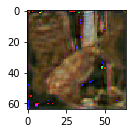

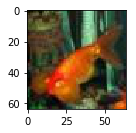

0.018377


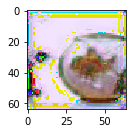

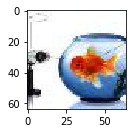

0.0320381


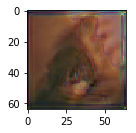

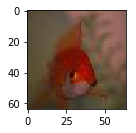

0.0214866


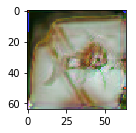

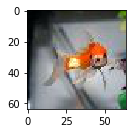

Next Epoch 110
0.012956
0.0183374
0.031984
0.021488
Next Epoch 111
0.0129485
0.0183524
0.0318869
0.0214748
Next Epoch 112
0.0129171
0.0182705
0.0318398
0.0214495
Next Epoch 113
0.0129218
0.0182858
0.0318037
0.0214465
Next Epoch 114
0.0128785


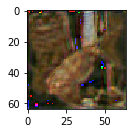

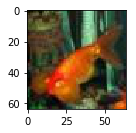

0.0182252


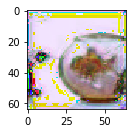

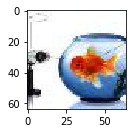

0.0317221


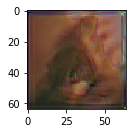

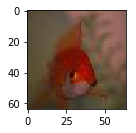

0.0214095


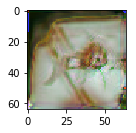

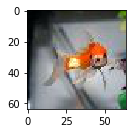

Next Epoch 115
0.0128853
0.0182236
0.0316801
0.0214027
Next Epoch 116
0.0128701
0.0182034
0.0316372
0.0213832
Next Epoch 117
0.0128677
0.0181956
0.031576
0.0213716
Next Epoch 118
0.012825
0.018175
0.0315071
0.0213591
Next Epoch 119
0.0128171


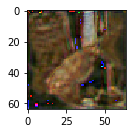

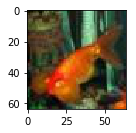

0.0181566


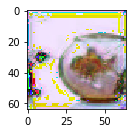

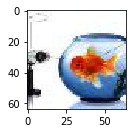

0.0314412


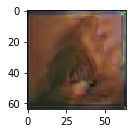

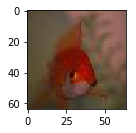

0.0213471


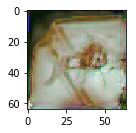

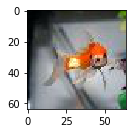

Next Epoch 120
0.0127948
0.0181294
0.0313808
0.021336
Next Epoch 121
0.0127771
0.0181164
0.0313227
0.0213204
Next Epoch 122
0.0127597
0.0180961
0.031282
0.0212919
Next Epoch 123
0.0127468
0.0180868
0.0312433
0.0212927
Next Epoch 124
0.0127328


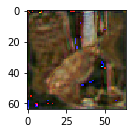

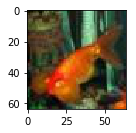

0.0180932


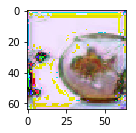

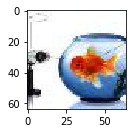

0.0311857


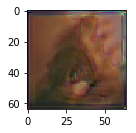

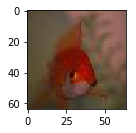

0.0212887


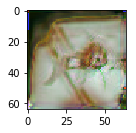

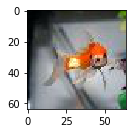

Next Epoch 125
0.0127319
0.0180619
0.0311185
0.0212721
Next Epoch 126
0.0127061
0.0180498
0.0310607
0.0212729
Next Epoch 127
0.0126941
0.018034
0.0309841
0.0212463
Next Epoch 128
0.0126599
0.0179933
0.0309561
0.0212248
Next Epoch 129
0.0126745


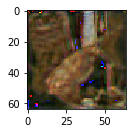

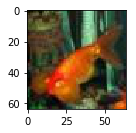

0.0180063


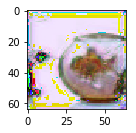

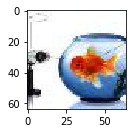

0.030908


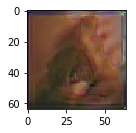

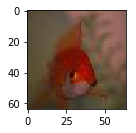

0.0212304


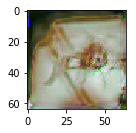

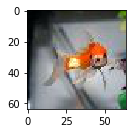

Next Epoch 130
0.0126418
0.0179722
0.0308385
0.0211971
Next Epoch 131
0.012644
0.0179466
0.0308209
0.021188
Next Epoch 132
0.0126285
0.0179674
0.0307749
0.0211839
Next Epoch 133
0.0126082
0.0179463
0.0307075
0.0211629
Next Epoch 134
0.0126016


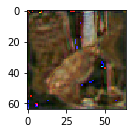

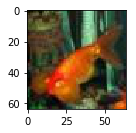

0.0179391


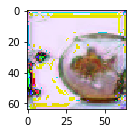

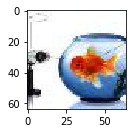

0.0306846


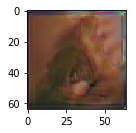

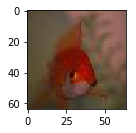

0.0211678


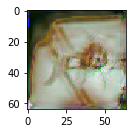

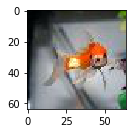

Next Epoch 135
0.0125848
0.0179209
0.0306102
0.0211251
Next Epoch 136
0.0125741
0.0179055
0.0306191
0.0211391
Next Epoch 137
0.0125543
0.0179228
0.0305024
0.0211287
Next Epoch 138
0.012543
0.0178367
0.0304745
0.0210869
Next Epoch 139
0.0125425


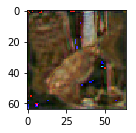

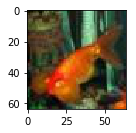

0.017875


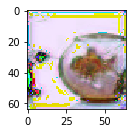

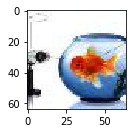

0.0304799


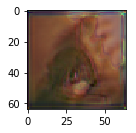

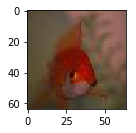

0.0211333


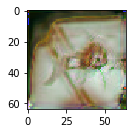

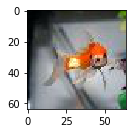

Next Epoch 140
0.0125062
0.0178909
0.0303626
0.021073
Next Epoch 141
0.0125007
0.0178083
0.0303834
0.021079
Next Epoch 142
0.0125027
0.0178616
0.0303163
0.021092
Next Epoch 143
0.0124723
0.0178123
0.0302343
0.0210321
Next Epoch 144
0.0124659


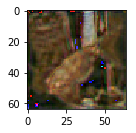

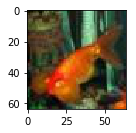

0.017793


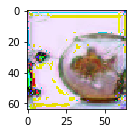

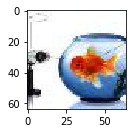

0.030264


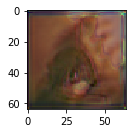

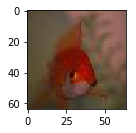

0.0210717


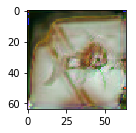

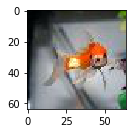

Next Epoch 145
0.0124673
0.0178388
0.0301687
0.0210524
Next Epoch 146
0.0124481
0.0177546
0.0301315
0.0210236
Next Epoch 147
0.0124516
0.0177822
0.0301309
0.0210543
Next Epoch 148
0.0124139
0.0177912
0.0300139
0.0209999
Next Epoch 149
0.012408


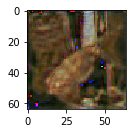

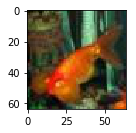

0.0177305


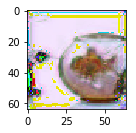

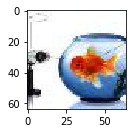

0.0300367


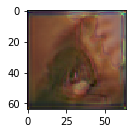

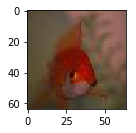

0.0210099


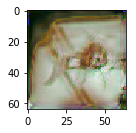

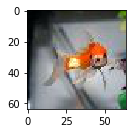

Next Epoch 150
0.0124019
0.0177869
0.0299764
0.0210162
Next Epoch 151
0.0123992
0.0177502
0.0299352
0.0209787
Next Epoch 152
0.0123855
0.0177511
0.0299194
0.0210183
Next Epoch 153
0.0123588
0.0177613
0.0298208
0.0209749
Next Epoch 154
0.0123579


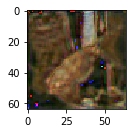

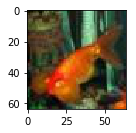

0.0176885


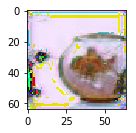

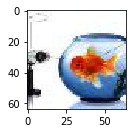

0.0298363


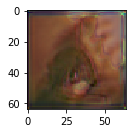

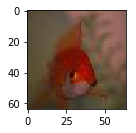

0.020982


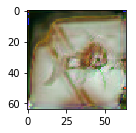

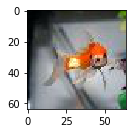

Next Epoch 155
0.012346
0.0177425
0.0297816
0.0209774
Next Epoch 156
0.0123325
0.0176829
0.0297315
0.0209288
Next Epoch 157
0.0123424
0.0176895
0.0297572
0.0209895
Next Epoch 158
0.0123089
0.0177443
0.0296566
0.0209414
Next Epoch 159
0.0123104


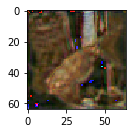

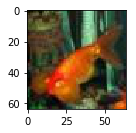

0.0176531


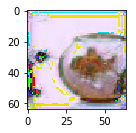

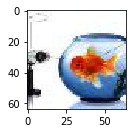

0.0296522


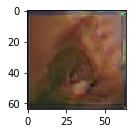

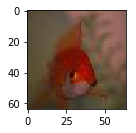

0.0209256


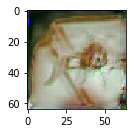

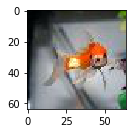

Next Epoch 160
0.0122907
0.0177049
0.0296282
0.0209547
Next Epoch 161
0.0122735
0.0177073
0.0295571
0.020917
Next Epoch 162
0.0122769
0.017653
0.0295554
0.0209461
Next Epoch 163
0.0122647
0.01772
0.029492
0.0209405
Next Epoch 164
0.0122452


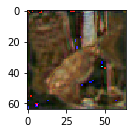

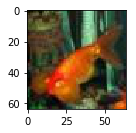

0.0176163


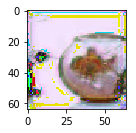

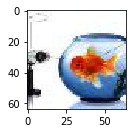

0.0294465


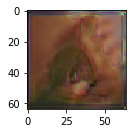

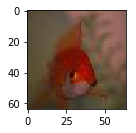

0.0208424


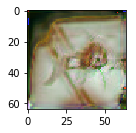

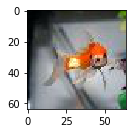

Next Epoch 165
0.0122497
0.0176084
0.0294996
0.0209288
Next Epoch 166
0.0122372
0.0176829
0.0293713
0.0208829
Next Epoch 167
0.0122258
0.0175765
0.0293954
0.0208732
Next Epoch 168
0.0122236
0.0176797
0.0293637
0.0209298
Next Epoch 169
0.0121978


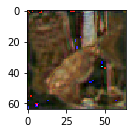

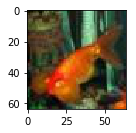

0.0176445


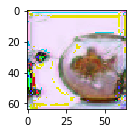

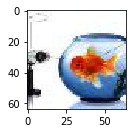

0.0292653


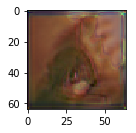

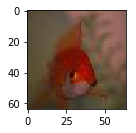

0.0208377


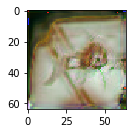

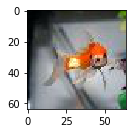

Next Epoch 170
0.0121937
0.0175872
0.0293211
0.0208865
Next Epoch 171
0.0121834
0.017672
0.029231
0.0208787
Next Epoch 172
0.0121656
0.0175867
0.0291891
0.0208497
Next Epoch 173
0.0121595
0.0175944
0.0291778
0.0208746
Next Epoch 174
0.0121421


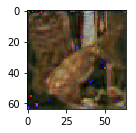

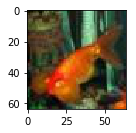

0.0176124


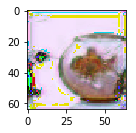

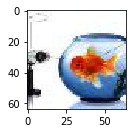

0.0291182


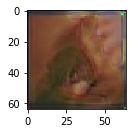

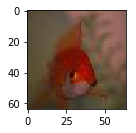

0.0208467


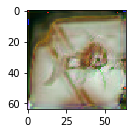

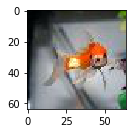

Next Epoch 175
0.0121412
0.0175652
0.0291046
0.0208306
Next Epoch 176
0.0121275
0.017586
0.029091
0.0208532
Next Epoch 177
0.012122
0.017586
0.0290169
0.0208343
Next Epoch 178
0.0121073
0.0175534
0.0290153
0.0208281
Next Epoch 179
0.0121166


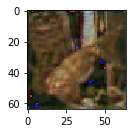

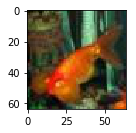

0.0175755


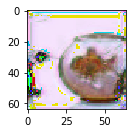

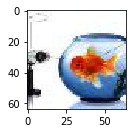

0.0289831


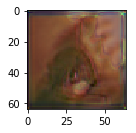

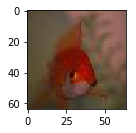

0.0208292


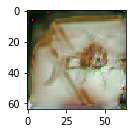

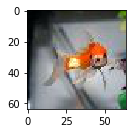

Next Epoch 180
0.0120998
0.0175769
0.0289575
0.020858
Next Epoch 181
0.0121002
0.0175806
0.0289101
0.0208266
Next Epoch 182
0.0120638
0.0175633
0.0289087
0.0208476
Next Epoch 183
0.0120818
0.0176102
0.0288457
0.0208276
Next Epoch 184
0.0120429


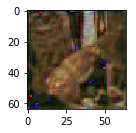

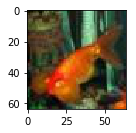

0.0175446


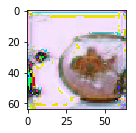

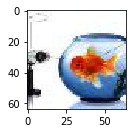

0.0288463


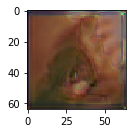

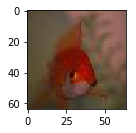

0.0208274


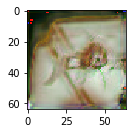

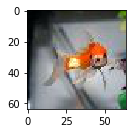

Next Epoch 185
0.0120746
0.0175567
0.0287812
0.0207973
Next Epoch 186
0.0120311
0.0175134
0.028818
0.0208595
Next Epoch 187
0.0120628
0.0175952
0.0286854
0.0207785
Next Epoch 188
0.0119916
0.0174555
0.0287918
0.0208405
Next Epoch 189
0.0120659


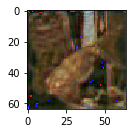

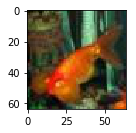

0.0176174


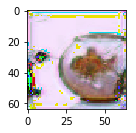

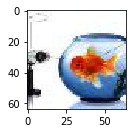

0.0286173


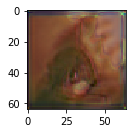

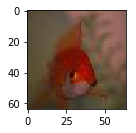

0.0207604


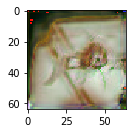

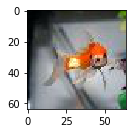

Next Epoch 190
0.0119384
0.0174376
0.0287993
0.0208595
Next Epoch 191
0.0121194
0.0176369
0.028552
0.020717
Next Epoch 192
0.0118908
0.0173842
0.028839
0.0208978
Next Epoch 193
0.0121464
0.0177321
0.0285027
0.0206925
Next Epoch 194
0.0118452


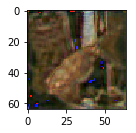

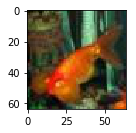

0.0173296


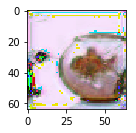

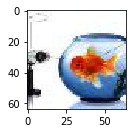

0.028889


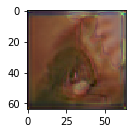

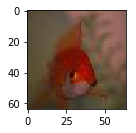

0.0209128


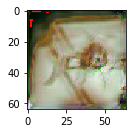

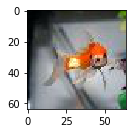

Next Epoch 195
0.0121803
0.0177685
0.0284709
0.0206547
Next Epoch 196
0.0118048
0.0173289
0.028946
0.0209374
Next Epoch 197
0.0121759
0.0178102
0.028438
0.0206251
Next Epoch 198
0.0117707
0.0172822
0.0289654
0.0209387
Next Epoch 199


In [29]:
tf.reset_default_graph()

#X = tf.placeholder(tf.float32, [None, 64, 64,1])

Y = tf.placeholder(tf.uint8 ,[None , 64,64,3])

is_training = tf.placeholder(tf.bool)

#X_train = lab_data[...,0:1]
#Y_train = lab_data[...,1:3]
#print (X_train.shape)
print (Y_train.shape)

with tf.variable_scope("model") as scope:
    #y_out = simpler_model(X)
    #y_out = complex_pokemon_model(X,True)
    hsv_out,rgb_out,hsv_in,rgb_in = baselinish2(Y,is_training)
    #hsv_out,rgb_out,hsv_in,rgb_in = complex_pokemon_model2(Y,is_training)
    loss = tf.reduce_mean(tf.square(rgb_out-rgb_in))
    
    #### A different loss function
    #tf.concat
    #lab2rgb(original_data[0,:,:,:]*std_dat + mean_dat )
    
    optimiser = tf.train.AdamOptimizer(3e-3)
    train_step = optimiser.minimize(loss)

    #scope.reuse_variables()
    #test_model = simpler_model(X,False)
    #test_model = complex_pokemon_model(X,False)
    #test_model = baselinish()
    #loss_test = (tf.nn.l2_loss(test_model - Y))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 12
epoch_number = 0
def train_epoch(target):
    sizee = target.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y: (target[i*batch_size:batch_size*i+batch_size]),is_training:True}
        losses,_,rgb_o,rgb_i = sess.run([loss,train_step,rgb_out,rgb_in],feed_dict)
        #if(i%5==0):
        print (losses)
        if(epoch_number %5 == 0):
            show_images(rgb_o[5])
            show_images(rgb_i[5])

  

def val_result(data, target):
    sizee = data.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y:  (target[i*batch_size:batch_size*i+batch_size]), X: data[i*batch_size:batch_size*i+batch_size],is_training:False}
        losses = sess.run([loss_test,rgb_out],feed_dict)
        if(i%5 ==0):
            print (losses)

num_epochs = 200
for i in range(num_epochs):
    epoch_number = i
    train_epoch(Y_train)
    print ("Next Epoch",i)
    
    #val_result(X_test, Y_test)

    


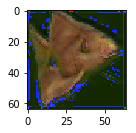

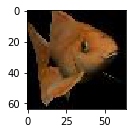

In [33]:
### Image visualisation
import matplotlib.pyplot as plt
import numpy.random as rnd

#def rgb2gray2(rgb):
 #   a = np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
  #  return a

rand_indices = np.random.choice(40,24)
#sample_images = X_train[rand_indices]
samp = Y_train[rand_indices]
#original_data = lab_data[rand_indices]
#sample_images = original_data[:,:,:,0:1]
#print (np.min(original_data[:,:,:,1:2]))
#print (np.max(original_data[:,:,:,1:2]))
#print (sample_images.shape)
#print (samp.shape)
#print (original_data.shape)

feed_dict = {Y:samp,is_training:True}
losses,_,rgb_o,rgb_i = sess.run([loss,train_step,rgb_out,rgb_in],feed_dict)
show_images(rgb_o[0])
show_images(rgb_i[0])
#model_generated_images = sess.run([y_out,loss],feed_dict)
#print (model_generated_images[1])
#print(model_generated_images[0].shape)

def show_images(images,gray = False):

    
    if(gray):
        plt.subplot(221)
        plt.imshow(images,cmap = plt.get_cmap('gray'))
        #plt.subplot(222)
        #plt.imshow(images[1], cmap = plt.get_cmap('gray'))
        #plt.subplot(223)
        #plt.imshow(images[2], cmap = plt.get_cmap('gray'))
        #plt.subplot(224)
        #plt.imshow(images[3], cmap = plt.get_cmap('gray'))
    else :
        plt.subplot(221)
        plt.imshow(images);
        #plt.subplot(222)
        #plt.imshow(images[1])
        #plt.subplot(223)
        #plt.imshow(images[2])
        #plt.subplot(224)
        #plt.imshow(images[3])

    plt.show()
    
#show_images(lab2rgb(original_data[0,:,:,:]  ) )
#show_images((samp[0]).astype('uint8'))
#original_data[...,1:3] = model_generated_images[0]
#show_images(original_data[0,:,:,0],gray = True)
#show_images(lab2rgb(original_data[0,:,:,:]*std_dat +mean_dat))
#show_images((model_generated_images[0][0] ).astype('uint8'))
    